# Exercise Number 3
by Orel Ben Israel - ID 205614845

and Maya Glassman - ID 207902966

In [1]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)
import io
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge # Import Ridge Regression
from sklearn.linear_model import Lasso # Import Lasso Regression
from sklearn.model_selection import train_test_split



In [2]:
data = 'https://drive.google.com/file/d/1Nsux2FSc5m5dBaxE6h3vd_ptfP7H7L0x/view?usp=share_link'
data_url = 'https://drive.google.com/uc?id=' + data.split('/')[-2]

In [3]:
df = pd.read_csv(data_url , encoding='utf-8')

##First Question

**Calculate Betas**

In [4]:
#initiate linear regression model
model = LinearRegression()

# Apply linear regression on all the data
y = df.iloc[:,:1]
X = df.iloc[:,1:]

#fit regression model
model_reg = model.fit(X, y)

betas_list = model.coef_.tolist()[0]

betas_list

[-0.06242617991463356,
 0.04991844677305897,
 0.15750322648404427,
 0.06145677802445182,
 -0.03980877445358004,
 0.1565729369872095,
 0.10164393027970835,
 0.0830085863841779,
 0.001411192613456929,
 -0.019013499898836404,
 0.09818566211457584,
 0.04848096933563966,
 -0.004619791370541757,
 0.026759454578791666,
 -0.018135223263652918,
 -0.05804275967635502,
 0.2190587479642164,
 -0.8126318221053331,
 0.04742097819908394,
 0.049288046999806455,
 0.0010747836900620172,
 0.5172523802211151,
 10.271455180461716,
 1.200878210588551]

**Calculate p-values**

In [5]:
#fit linear regression model
model = sm.OLS(y, X).fit()

p_values = []
for i in range(len(X.columns)):
  p_values.append(model.pvalues[i])

p_values

[0.11625919668995541,
 0.14911976521736564,
 1.1712088312157643e-09,
 0.14401905379629254,
 0.35330832657209266,
 4.403815411407797e-11,
 0.008494402453927193,
 0.021843693885539944,
 0.9629690926019069,
 0.33597341256423474,
 3.7104072921768026e-05,
 0.08139591064542037,
 0.5570183135593272,
 0.4011149309284261,
 0.2557429633065395,
 0.8274140718359078,
 0.6687006980780394,
 0.32903567070683226,
 1.1269794953097735e-23,
 1.440624527150378e-76,
 0.6142439522490384,
 0.9468176045036731,
 0.37350087133444765,
 7.366645551474091e-07]

##Second Question

**Redge regression**

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mse_list_ridge = []

In [7]:
alphas = np.logspace(start = -5, stop = 7, num = 100, base = 10) # Range of regularization coefficients

for i in range(len(alphas)): # Looping across all coefficients

    # Ridge
    model_ridge = Ridge(alpha = alphas[i]) # Setting Regularization parameter to alphas[i]
    model_ridge.fit(X_train, y_train) # Fitting Ridge regression
    y_hat_ridge = model_ridge.predict(X_test) # Predicting all X's given the Ridge fit
    # y_hat_ridge_list = [item for sublist in y_hat_ridge.tolist() for item in sublist]
    mse_list_ridge.append(mean_squared_error(y_test,y_hat_ridge))

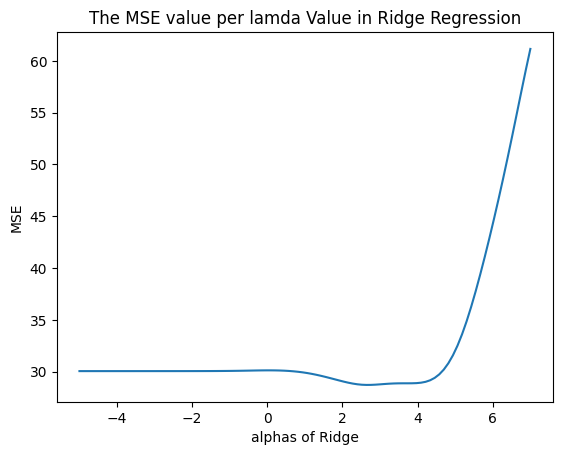

In [8]:
plt.title("The MSE value per lamda Value in Ridge Regression")
plt.plot(np.log10(alphas), mse_list_ridge)
plt.xlabel("alphas of Ridge")
plt.ylabel("MSE")
plt.show()

In [9]:
ridge_min_lamda = alphas[np.argmin(mse_list_ridge)]
print("The optimal lamda for the ridge regression is ", ridge_min_lamda)

The optimal lamda for the ridge regression is  432.87612810830615


In [10]:
mse_list_lasso = []

for i in range(len(alphas)): # Looping across all coefficients
    # Lasso
    clf_lasso = Lasso(alpha = alphas[i]) # Setting Regularization parameter to alphas[i]
    clf_lasso.fit(X_train, y_train) # Fitting Lasso regression
    y_hat_lasso = clf_lasso.predict(X_test) # Predicting all X's given the Lasso fit
    # y_hat_lasso_list = y_hat_lasso.tolist()
    mse_list_lasso.append(mean_squared_error(y_test,y_hat_lasso))


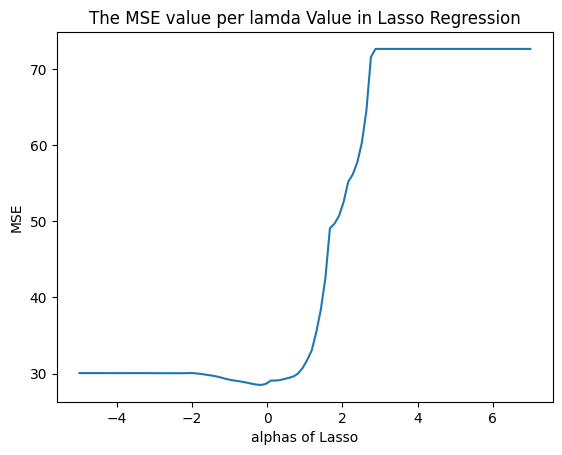

In [11]:
plt.title("The MSE value per lamda Value in Lasso Regression")
plt.plot(np.log10(alphas), mse_list_lasso)
plt.xlabel("alphas of Lasso")
plt.ylabel("MSE")
plt.show()

In [12]:
lasso_min_lamda = alphas[np.argmin(mse_list_lasso)]
print("The optimal lamda for the lasso regression is ", lasso_min_lamda)

The optimal lamda for the lasso regression is  0.7054802310718645


##Third & Fourth Questions

In [13]:
def sample_randomly(num_samples):
  samples_a = df.sample(n=num_samples)
  samples_a_x = samples_a.iloc[:,1:]
  samples_a_y = samples_a.iloc[:,:1]
  return samples_a_x, samples_a_y


In [14]:
def sample_in_a_row(num_samples):
  # Choose a random starting position between 1 and 399
  start_pos = np.random.randint(1, 399)

  # Extract 100 samples starting at the random position
  samples_b = df.iloc[start_pos:start_pos+num_samples, :]
  samples_b_x = samples_b.iloc[:,1:]
  samples_b_y = samples_b.iloc[:,:1]
  return samples_b_x, samples_b_y

In [15]:
def run_OLS(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LinearRegression()
  model_reg = model.fit(X_train, y_train)
  y_hat = model_reg.predict(X_test)
  MSE = mean_squared_error(y_test,y_hat)
  bias = np.mean(np.abs(model_reg.coef_-betas_list))
  return MSE, bias

In [16]:
def run_ridge(X,y,lamda):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_ridge = Ridge(alpha = lamda) # Setting Regularization parameter to alphas[i]
  model_ridge.fit(X_train, y_train) # Fitting Ridge regression
  y_hat = model_ridge.predict(X_train) # Predicting all X's given the Ridge fit
  # y_hat_ridge_list = [item for sublist in y_hat_ridge.tolist() for item in sublist]
  MSE = mean_squared_error(y_train, y_hat)
  bias = np.mean(np.abs(model_ridge.coef_-betas_list))
  return MSE, bias

In [17]:
def run_lasso(X,y,lamda):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_lasso = Lasso(alpha = lamda) # Setting Regularization parameter to opt
  model_lasso.fit(X_train, y_train) # Fitting Lasso regression
  y_hat = model_lasso.predict(X_train) # Predicting all X's given the lasso fit
  # y_hat_lasso_list = y_hat_lasso.tolist()
  MSE = mean_squared_error(y_train,y_hat)
  bias = np.mean(np.abs(model_lasso.coef_-betas_list))

  return MSE, bias

In [18]:
# Create 12 lists in which we will save the data from the simulation

MSEs_OLS_rand = []
biases_OLS_rand = []
MSEs_OLS_row = []
biases_OLS_row = []
MSEs_ridge_rand = []
biases_ridge_rand = []
MSEs_ridge_row = []
biases_ridge_row = []
MSEs_lasso_rand = []
biases_lasso_rand = []
MSEs_lasso_row = []
biases_lasso_row = []

In [19]:
opt_lamda_ridge = ridge_min_lamda
opt_lamda_lasso = lasso_min_lamda

for i in range(1000):
  # Create 2 samples - a random sample  sized 100 and a sample of 100 samples in a row.
  sample_rand_x, sample_rand_y = sample_randomly(100)
  sample_row_x, samples_row_y = sample_in_a_row(100)

  # First sample:
  MSE_OLS_rand, bias_OLS_rand = run_OLS(sample_rand_x, sample_rand_y)
  MSE_ridge_rand, bias_ridge_rand = run_ridge(sample_rand_x, sample_rand_y, opt_lamda_ridge)
  MSE_lasso_rand, bias_lasso_rand = run_lasso(sample_rand_x, sample_rand_y, opt_lamda_lasso)

  # Save the data
  MSEs_OLS_rand.append(MSE_OLS_rand)
  biases_OLS_rand.append(bias_OLS_rand)
  MSEs_ridge_rand.append(MSE_ridge_rand)
  biases_ridge_rand.append(bias_ridge_rand)
  MSEs_lasso_rand.append(MSE_lasso_rand)
  biases_lasso_rand.append(bias_lasso_rand)

  #2nd Sample:
  MSE_OLS_row, bias_OLS_row = run_OLS(sample_row_x, samples_row_y)
  MSE_ridge_row, bias_ridge_row = run_ridge(sample_row_x, samples_row_y, opt_lamda_ridge)
  MSE_lasso_row, bias_lasso_row = run_lasso(sample_row_x, samples_row_y, opt_lamda_lasso)

  # Save the data
  MSEs_OLS_row.append(MSE_OLS_row)
  biases_OLS_row.append(bias_OLS_row)
  MSEs_ridge_row.append(MSE_ridge_row)
  biases_ridge_row.append(bias_ridge_row)
  MSEs_lasso_row.append(MSE_lasso_row)
  biases_lasso_row.append(bias_lasso_row)

In [20]:
#insert all thw mse's lists to one list

MSEs_list = [MSEs_OLS_rand, MSEs_OLS_row, MSEs_ridge_rand, MSEs_ridge_row, MSEs_lasso_rand, MSEs_lasso_row]
title_MSEs_list = ["MSEs_OLS_rand", "MSEs_OLS_row", "MSEs_ridge_rand", "MSEs_ridge_row", "MSEs_lasso_rand", "MSEs_lasso_row"]

#insert all thw bias's lists to one list

biass_list = [biases_OLS_rand, biases_OLS_row, biases_ridge_rand, biases_ridge_row, biases_lasso_rand, biases_lasso_row]
title_biass_list = ["biases_OLS_rand", "biases_OLS_row", "biases_ridge_rand", "biases_ridge_row", "biases_lasso_rand", "biases_lasso_row"]

##Fifth Question

*** Please notice that in the following section we seperated the data into train and test, because without it the best performance was of the OLS, due to over-fitting.

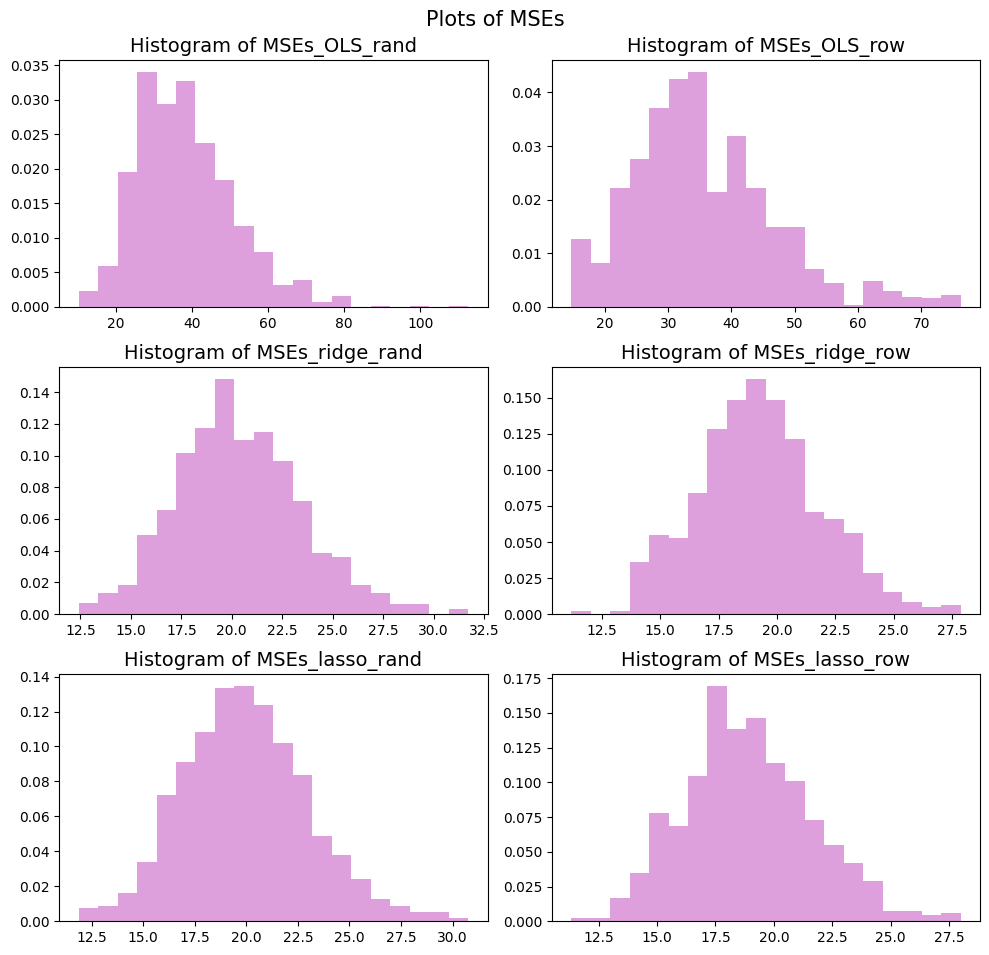

In [21]:
# 2 plot, one for each measurements, with 6 subplots each

# MSE
fig, ax = plt.subplots(figsize=(10,10), nrows = 3, ncols = 2)
st = fig.suptitle("Plots of MSEs", fontsize=15)


for i in range(len(MSEs_list)):
    
    row = i // 2
    column = i % 2

    ax[row, column].hist(MSEs_list[i], density=True, bins=20, histtype='bar', color="plum")

    ax[row, column].set_title("Histogram of " + title_MSEs_list[i], fontsize = 14)

plt.tight_layout()

# shift subplots down:
st.set_y(0.95)
fig.subplots_adjust(top=0.9)

plt.show()

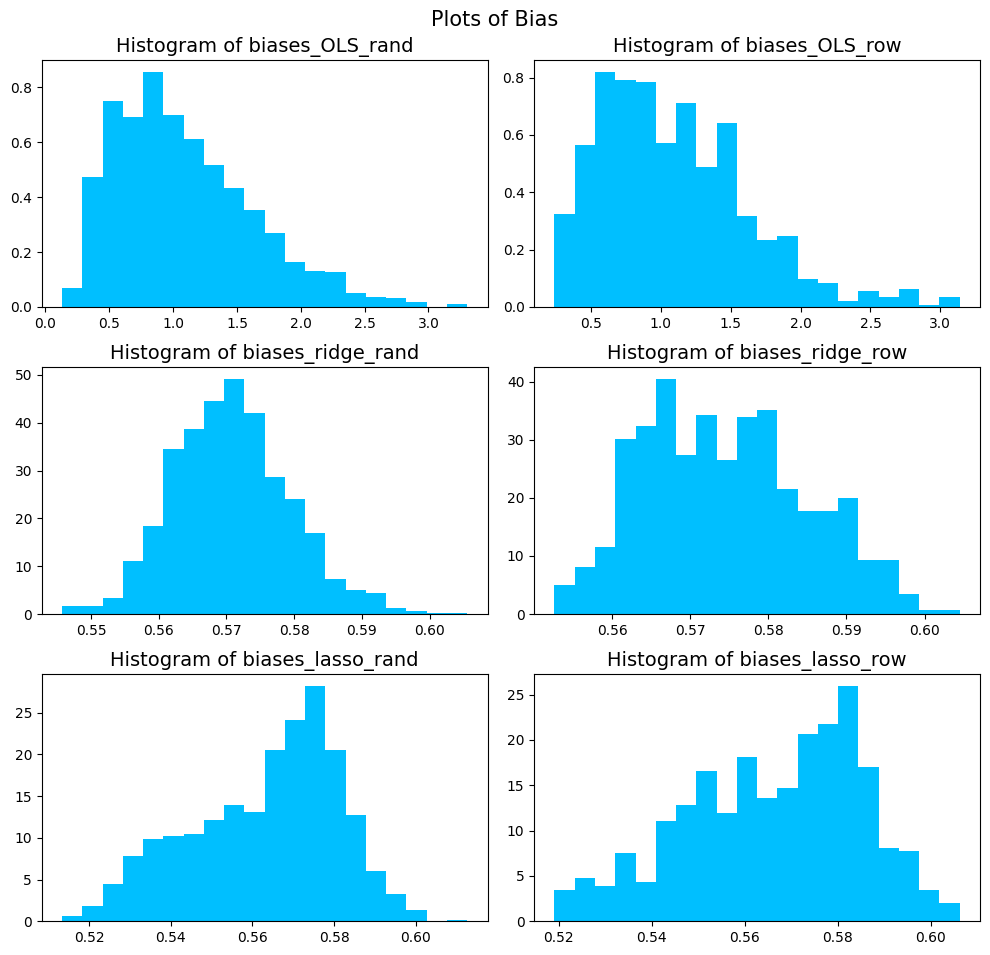

In [22]:
fig, ax = plt.subplots(figsize=(10,10), nrows = 3, ncols = 2)
st = fig.suptitle("Plots of Bias", fontsize=15)

# Bias

for i in range(len(biass_list)):
    
    row = i // 2
    column = i % 2

    ax[row, column].hist(biass_list[i], density=True, bins=20, histtype='bar', color="deepskyblue")

    ax[row, column].set_title("Histogram of " + title_biass_list[i], fontsize = 14)

plt.tight_layout()

# shift subplots down:
st.set_y(0.95)
fig.subplots_adjust(top=0.9)

plt.show()

At first, We ran the code without splitting into Train and test, and the result was that the regression without any regularization performs best. However, this is expected - When we train and test on the same data, the result is that we reach overfitting, and it performs best without any constraints in the form of regularization.

However, when we split the data into train and test, we get a clearer and more accurate view. In regards to MSE, both ridge and Lasso perform much better then regular regression. There isn't a clear difference between the 2 regularisations.

When considering the Biases, we can spot a small preference in favor of Lasso.


##Sixth Question

**Print the Lasso regression (on the whole data) Betas**

In [23]:
# Operate Lasso regression on the whole data
clf_lasso = Lasso(alpha = lasso_min_lamda) # Setting Regularization parameter to be the optimal lamda
clf_lasso.fit(X, y) # Fitting Lasso regression on the whole data
y_hat_lasso = clf_lasso.predict(X) # Predicting all X's given the Lasso fit

lasso_betas_list = clf_lasso.coef_.tolist()
lasso_betas_list

[-0.02611119367659287,
 0.03150417366151032,
 0.1533291690681973,
 0.04828631361339495,
 -0.0,
 0.15037801386942978,
 0.08874847489878174,
 0.07298927163837941,
 0.0,
 -0.008030288959151664,
 0.09093616162854695,
 0.041593859657325864,
 -0.0011421563113367763,
 0.016064781070943744,
 -0.008704042269940844,
 -0.0,
 0.0,
 -0.0,
 0.045707609622266984,
 0.04929050444034797,
 0.00040601718874479974,
 -0.0,
 0.0,
 0.4227450940037747]

In [24]:
columns = ["P_Values", "Lasso_Betas"]
index = df.columns.to_list()[1:]

comparison_df = pd.DataFrame(list(zip(p_values, lasso_betas_list)), columns=columns,index=index)

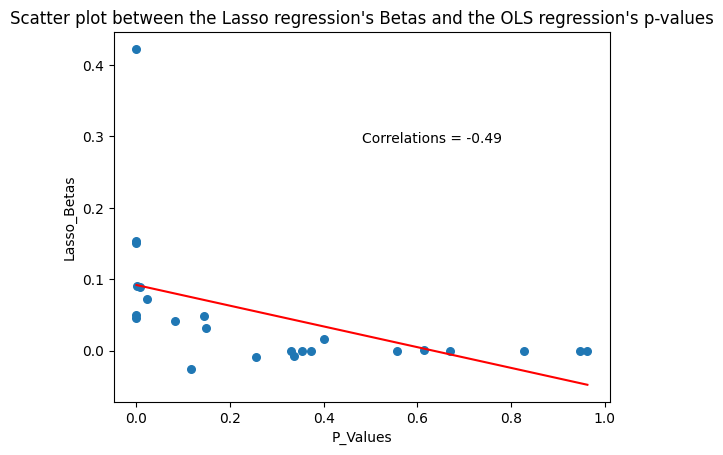

In [25]:
import matplotlib.pyplot as plt

comparison_df.plot.scatter(x = 'P_Values', y = 'Lasso_Betas', title= "Scatter plot between the Lasso regression's Betas and the OLS regression's p-values", s = 30)

import scipy.stats as stats

r, p = stats.pearsonr(p_values, lasso_betas_list)
plt.annotate('Correlations = {:.2f}'.format(r), xy=(0.5, 0.7), xycoords='axes fraction')

# fits the best fitting line to the data
plt.plot(np.unique(p_values), np.poly1d(np.polyfit(p_values, lasso_betas_list, 1))
         (np.unique(p_values)), color='red')

In [26]:
correlation = comparison_df["Lasso_Betas"].corr(comparison_df["P_Values"])
print("The correlation between Lasso betas and the OLS p-values is: ", correlation)

The correlation between Lasso betas and the OLS p-values is:  -0.49089033354943545


It's important to note that Lasso and OLS use different methods to estimate the regression coefficients. Lasso uses a penalty term that shrinks the coefficients towards zero, while OLS does not use any penalty term. As a result, Lasso may produce coefficients that are significantly different from OLS.

Overall, the negative correlation between Lasso betas and OLS p-values indicates that Lasso tends to produce smaller coefficients for variables that OLS would consider to be statistically significant, while larger coefficients for variables that OLS would consider to be non-significant.